# SA2

#### Karl  Isaiah  D.  Buenafe

In [68]:
import numpy as np
import scipy.stats as spt
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

### QUESTION 7

The dataset contains 10 individuals' self-esteem scores on three-time points during a specific diet to determine whether their self-esteem improved.

One-way repeated measures ANOVA can be performed to determine the effect of time on the self-esteem score and complete the table below. (Provide the answser in 3 decimal places.)

In [4]:
df1= pd.read_csv('self-esteem.csv')
df1

,id,t1,t2,t3
0,1,4.005027,5.182286,7.107831
1,2,2.558124,6.912915,6.308434
2,3,3.244241,4.443434,9.778410
3,4,3.419538,4.711696,8.347124
4,5,2.871243,3.908429,6.457287
5,6,2.045868,5.340549,6.653224
6,7,3.525992,5.580695,6.840157
7,8,3.179425,4.370234,7.818623
8,9,3.507964,4.399808,8.471229
9,10,3.043798,4.489376,8.581100


In [10]:
df1_melt=pd.melt(df1.reset_index(), id_vars=['id'],
                value_vars=['t1','t2','t3'])

df1_melt.columns=['ID','Time_points','score']
df1_melt.head(10)

,ID,Time_points,score
0,1,t1,4.005027
1,2,t1,2.558124
2,3,t1,3.244241
3,4,t1,3.419538
4,5,t1,2.871243
5,6,t1,2.045868
6,7,t1,3.525992
7,8,t1,3.179425
8,9,t1,3.507964
9,10,t1,3.043798


In [17]:
anova1=pg.rm_anova(dv='score',within='Time_points', subject="ID", data=df1_melt, detailed=True)
anova1

,Source,SS,DF,MS,F,p-unc,ng2,eps
0,Time_points,102.455828,2,51.227914,55.469039,2.013826e-08,0.828595,0.690061
1,Error,16.623732,18,0.923541,NaN,NaN,NaN,NaN


In [21]:
sph=pg.sphericity(data=df1_melt, dv='score', within='Time_points', subject='ID')
sph

SpherResults(spher=True, W=0.5508535899321344, chi2=4.770289777118488, dof=2, pval=0.09207563790625896)

In [84]:
pairwise_results = pg.pairwise_tests(dv='score', 
                                      within='Time_points', 
                                      subject='ID', 
                                      data=df1_melt, 
                                      parametric=True, 
                                      alpha=0.05, 
                                      padjust='none', 
                                      return_desc=True)
pairwise_results

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Time_points,t1,t2,True,True,-4.967619,9.0,two-sided,7.724186e-04,50.694,-2.371801
1,Time_points,t1,t3,True,True,-13.228148,9.0,two-sided,3.343805e-07,4.02e+04,-4.799517
2,Time_points,t2,t3,True,True,-4.867816,9.0,two-sided,8.861905e-04,45.195,-2.556195


In [44]:
df1_melt.pairwise_tukey(dv='score', between='Time_points').round(3)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,t1,t2,3.140,4.934,-1.794,0.396,-4.527,0.0,-2.372
1,t1,t3,3.140,7.636,-4.496,0.396,-11.348,0.0,-4.800
2,t2,t3,4.934,7.636,-2.702,0.396,-6.820,0.0,-2.556


In [83]:
model = ols('score ~ Time_points', data=df1_melt).fit()
result = anova_lm(model)

print(result)

               df      sum_sq    mean_sq          F        PR(>F)
Time_points   2.0  102.455828  51.227914  65.261034  4.563540e-11
Residual     27.0   21.194174   0.784969        NaN           NaN


The table below shows the yields in bushels per acre of a certain variety of wheat grown in a particular type of soil treated with chemicals A, B, or C. 

In [63]:

A= [48,49,50,49]
B= [47,49,48,48]
C= [49,51,50,50]

data = {
    'chemical': ['A'] * len(A) + ['B'] * len(B) + ['C'] * len(C),
    'value': A + B + C
}
df2=pd.DataFrame(data)

df2

,chemical,value
0,A,48
1,A,49
2,A,50
3,A,49
4,B,47
5,B,49
6,B,48
7,B,48
8,C,49
9,C,51


In [82]:
model2 = ols('value ~ chemical', data=df2).fit()
result2 = anova_lm(model)

print(result2)

           df  sum_sq   mean_sq    F    PR(>F)
chemical  2.0     8.0  4.000000  6.0  0.022085
Residual  9.0     6.0  0.666667  NaN       NaN


In [66]:
SSB = result['sum_sq'][0]
SST = np.sum((df2['value'] - np.mean(df2['value']))**2)

print(f"Eta-squared: {SSB/SST}")

Eta-squared: 0.5714285714285685


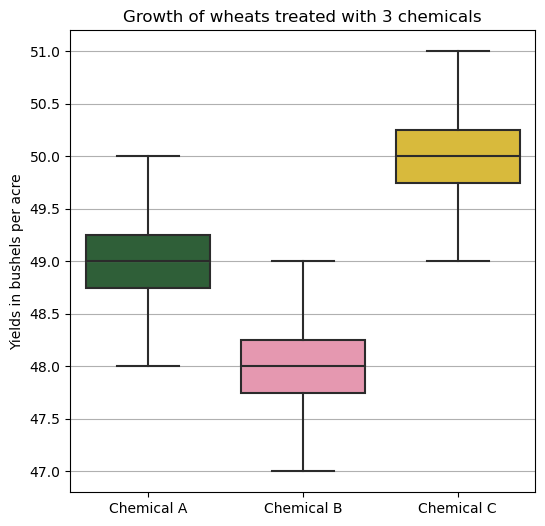

In [79]:
data = [A,B,C] 
['Chemical A', 'Chemical B', 'Chemical C']

palette=["#276733",'#F28BAB', '#F2CA22']
plt.figure(figsize=(6, 6))
ax=sns.boxplot(data=data, 
            palette=sns.set_palette(palette))

plt.title('Growth of wheats treated with 3 chemicals')
plt.ylabel('Yields in bushels per acre')
plt.grid(axis='y')
ax.set_xticklabels(['Chemical A', 'Chemical B', 'Chemical C'])
plt.show()

In [81]:
df2_levene=spt.levene(A,B,C , center='mean')
df2_levene

LeveneResult(statistic=0.0, pvalue=1.0)